In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

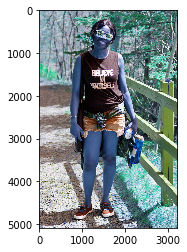

In [2]:
# read the image

img = cv2.imread("./Moi.jpg")
plt.imshow(img)


<p><b>OpenCV uses by default the BGR pixel format. But this image can be converted to RGB </b></p>

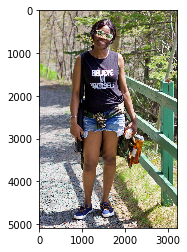

In [3]:
#convert BRG to RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#show image
plt.imshow(img2)

 <p><b>Transform the same image to gray scale</b></p>

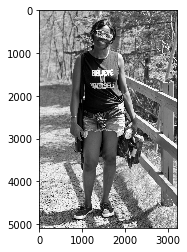

In [33]:
#Convert to grayscale
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#show image
plt.imshow(img3, cmap='gray')

<p><b>Image resizing refers to the scaling of images. Scaling comes handy in many image processing as well as machine learning applications. It helps in reducing the number of pixels from an image and that has several advantages e.g. Image resizing is vital in machine learning because it can reduce the time of training of a neural network.</b></p>
<p><b>Often times we need to resize the image either by shirking it or scaling it up to meet the size requirements. OpenCV provides us several interpolation methods for resizing an image.</b></p>

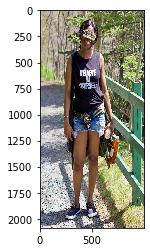

In [34]:
WIDTH = 1000
HEIGHT = 2087

img4 = cv2.resize(img2, (WIDTH, HEIGHT))

# show image
plt.imshow(img4)

<p><b>The original image width and height -- 3229 by 5087. I want to rescale the image close to what it was before resizing.</b></p>
<p><b>In rescaling, do pay careful attention on locking down the aspect ratio to prevent distortion in the image. </b></p>

0.634755258502064


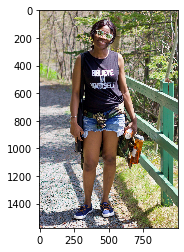

In [35]:
img_aspect = img2.shape[1] / float(img2.shape[0])
print(img_aspect)

if(img_aspect > 1):
    # landscape orientation - wide image
    res = int(img_aspect * HEIGHT)
    img4 = cv2.resize(img2, (res, HEIGHT))
if(img_aspect < 1):
    # portrait orientation - tall image
    res = int(WIDTH / img_aspect)
    img4 = cv2.resize(img2, (WIDTH, res))
if(img_aspect == 1):
    img4 = cv2.resize(img2, (WIDTH, HEIGHT))

# show the image
plt.imshow(img4)

<p><b>The code snippet below handles the <u>cropping</u> of the same image.</b></p>

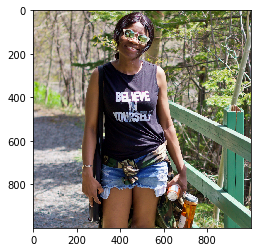

In [41]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//6-(cropx//6)
    starty = y//10-(cropy//10)    # changed both startx and starty number over & over to find the right shape
    return img[starty:starty+cropy, startx:startx+cropx]

# Scaled image
img_cropped = crop_center(img4, WIDTH, WIDTH)

# show image
plt.imshow(img_cropped, cmap='gray')

<p><b>You can draw on the image</b></p>

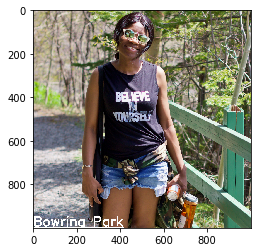

In [132]:
image = img_cropped.copy()

# add some text
cv2.putText(image, "Bowring Park", (0, 990), # text position
            cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255, 255, 255), 6) # size, text color & thickness

# add a line
cv2.line(image, (0, 1000), (415, 1000), (255, 255, 255), 6) # line position, line length, linecolor & thickness

# show image
plt.imshow(image, cmap='gray')